<a href="https://colab.research.google.com/github/tpSpace/neural-network-from-scratch/blob/master/nn_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libararies

In [ ]:
import numpy as np
# import cupy as np
import matplotlib.pyplot as plt
import opendatasets as od
import pandas as pd

In [81]:
# od.download("https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data/data")
od.download("https://www.kaggle.com/competitions/digit-recognizer/data")

Skipping, found downloaded files in "./digit-recognizer" (use force=True to force download)


In [ ]:
# load data set from csv file.
data_train = pd.read_csv('./digit-recognizer/train.csv')
data_test = pd.read_csv('./digit-recognizer/test.csv')
# print data ( lucky for us the data has been processed into csv file)
data_train.head()

In [83]:
# convert data into numpy array type.
data_train = np.array(data_train)
data_test = np.array(data_test)

# get dimension from the dataset
m, n = data_train.shape
print(m, n)

# let get the matrix transposed
data_train = data_train[:].T
x_train = data_train[1:n]
y_train = data_train[0]

data_test = data_test[:].T
x_test = data_train[1:n]
y_test = data_train[0]

42000 785


In [84]:
def init_params():
  w1 = np.random.randn(10,784) - 0.5
  b1 = np.random.randn(10, 1)
  w2 = np.random.randn(10,10) - 0.5
  b2 = np.random.randn(10, 1)
  return w1, b1, w2, b2

def ReLU(z):
  # if z > 0 then return z else return 0
  return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Stability improvement
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def forward_prop(w1, b1, w2, b2, x):
  x = np.array(x)
  z1 = w1.dot(x) + b1
  a1 = ReLU(z1)

  z2 = w2.dot(a1) + b2
  a2 = softmax(z2)
  return z1, a1, z2, a2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(z):
  return z > 0

def back_prop(z1, a1, z2, a2, w1, w2, x, y):
  m = y.size
  one_hot_y = one_hot(y)

  dz2 = a2 - one_hot_y
  dw2 = 1 / m * dz2.dot(a1.T)
  db2 = 1 / m * np.sum(dz2, axis=1, keepdims=True) # , axis=1, keepdims=True

  dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
  dw1 = 1 / m * dz2.dot(x.T)
  db1 = 1 / m * np.sum(dz1, axis=1, keepdims=True) # , axis=1, keepdims=True

  return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1

  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * db2

  return w1, b1, w2, b2



In [85]:
def get_predictions(a2):
  return np.argmax(a2, 0)

def get_accuracy(predictions, y):
  print(predictions ,y)
  return np.sum(predictions == y) / y.size

def gradient_descent(x, y, iterations, alpha):
  w1, b1, w2, b2 = init_params()

  for i in range(iterations):

      z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
      dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w1, w2, x, y)
      w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

      if (i % 10 == 0):
          print("Iteration: ", i)
          print("Accuracy: ", get_accuracy(get_predictions(a2), y))
  return w1, b1, w2, b2


In [86]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 666, 0.01)

Iteration:  0
[8 8 8 ... 8 8 8] [1 0 1 ... 7 6 9]
Accuracy:  0.09678571428571428
Iteration:  10
[3 5 1 ... 7 4 2] [1 0 1 ... 7 6 9]
Accuracy:  0.36233333333333334
Iteration:  20
[3 0 1 ... 9 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.6061904761904762
Iteration:  30
[1 2 1 ... 7 2 4] [1 0 1 ... 7 6 9]
Accuracy:  0.5317857142857143
Iteration:  40
[1 0 1 ... 7 6 4] [1 0 1 ... 7 6 9]
Accuracy:  0.6079285714285714
Iteration:  50
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.6990714285714286
Iteration:  60
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7595
Iteration:  70
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7637142857142857
Iteration:  80
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.765
Iteration:  90
[8 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7328333333333333
Iteration:  100
[8 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7547142857142857
Iteration:  110
[8 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7666428571428572
Iteration:  120
[1 0 1 ... 7 6 7] [1 0 1 ... 7 6 9

In [90]:
def make_predictions(x, w1, b1, w2, b2):
  _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
  predictions = get_predictions(a2)
  return predictions

def test_prediction(index, w1, b1, w2, b2):
  current_image = x_test[:, index, None]
  predictions = make_predictions(x_test[:, index, None], w1, b1, w2, b2)
  label = y_test[index]
  print("Prediction: ", predictions)
  print("Label: ", label)

  current_image = current_image.reshape((28,28))
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction:  [0]
Label:  0


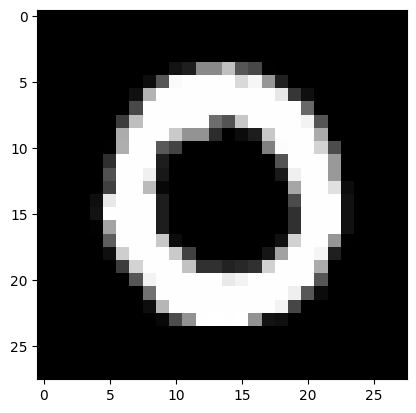

Prediction:  [1]
Label:  1


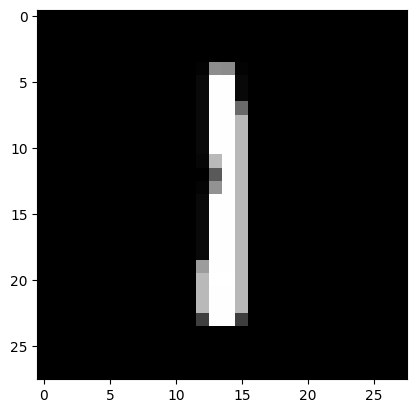

Prediction:  [2]
Label:  4


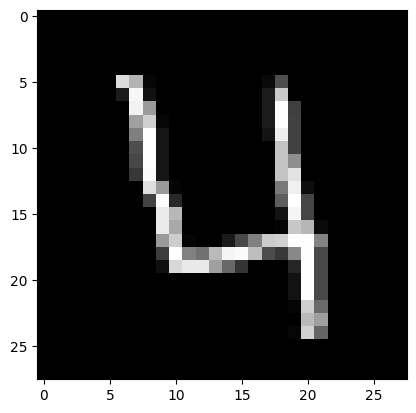

In [93]:
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)